In [306]:
# Imports
import myPCA
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [307]:
# Upload and first check
df = pd.read_csv('titanic.csv',delimiter=",",decimal=".")
print("Tamaño de datos:\n",df.shape)
print("Tipos de Columnas:\n",df.dtypes)
NaNColumns = df.columns[df.isna().any()]
print("Columnas con NA:\n",NaNColumns)
print("Cantidad de NA por columna:\n",df[NaNColumns].isnull().sum(axis = 0))


Tamaño de datos:
 (1309, 12)
Tipos de Columnas:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object
Columnas con NA:
 Index(['Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')
Cantidad de NA por columna:
 Age          263
Fare           1
Cabin       1014
Embarked       2
dtype: int64


In [308]:

'''
Columns erased:
1. PassengerId: Is is just data to recognize a passenger and not make any effect in the survival
2. Name: Is is just data to recognize a passenger and not make any effect in the survival
3. Ticket: Is is just data to recognize a passenger and not make any effect in the survival
3. Cabin: Have values with more than a 75% of data with NaN
'''
df.drop(columns = ["PassengerId" ,"Name","Cabin","Ticket"],inplace=True)
before = df.shape
df.dropna(inplace= True)
print("Se borran en total",(before[0]-df.shape[0]),"registros")

Se borran en total 266 registros


Descripcion:
                Age        SibSp        Parch         Fare
count  1043.000000  1043.000000  1043.000000  1043.000000
mean     29.813202     0.504314     0.421860    36.603024
std      14.366254     0.913080     0.840655    55.753648
min       0.170000     0.000000     0.000000     0.000000
25%      21.000000     0.000000     0.000000     8.050000
50%      28.000000     0.000000     0.000000    15.750000
75%      39.000000     1.000000     1.000000    35.077100
max      80.000000     8.000000     6.000000   512.329200


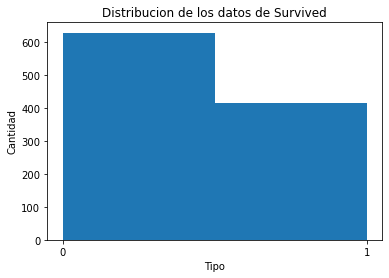

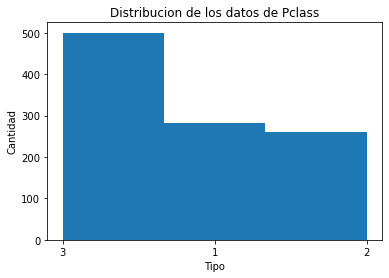

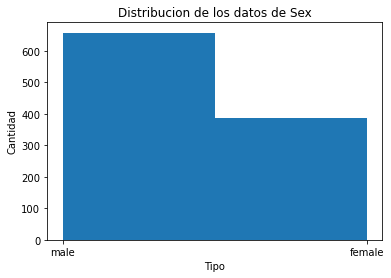

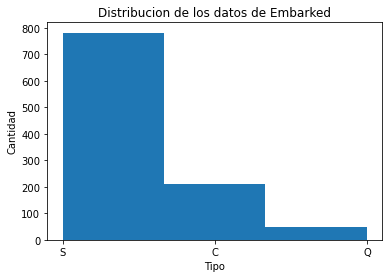

In [309]:
numericColumns = ['Age','SibSp','Parch','Fare']
categoricalColumns = ['Survived','Pclass','Sex','Embarked']
numericos = df.loc[:,numericColumns]
categoricos = df.loc[:,categoricalColumns]
print("Descripcion:\n",numericos.describe())

for column in categoricos.columns:
	datos = categoricos.loc[:,column]
	categorias = datos.unique()
	mapeo = {}
	for i in range(len(categorias)):
		mapeo[categorias[i]] = i
	plt.hist(datos.map(mapeo),bins=len(categorias))
	plt.title("Distribucion de los datos de "+column)
	plt.xlabel("Tipo")
	plt.ylabel("Cantidad")
	plt.xticks(range(len(categorias)),categorias)
	plt.show()
# plt.hist(numericos['SibSp'],bins=30)
# plt.show()
# plt.hist(numericos['Parch'],bins=30)
# plt.show

In [310]:
import seaborn as sns
# Nos permite hacer el ploteo en todas las columnas
# sns.pairplot(df, hue = 'Survived')

In [311]:
df = pd.get_dummies(df,columns=categoricalColumns)
df.keys()
df

,Age,SibSp,Parch,Fare,Survived_0,Survived_1,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,7.2500,1,0,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,0,1,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,1,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,0,1,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,1,0,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3.0,1,1,13.7750,0,1,0,0,1,1,0,0,0,1
1302,37.0,1,0,90.0000,0,1,1,0,0,1,0,0,1,0
1303,28.0,0,0,7.7750,0,1,0,0,1,1,0,0,0,1
1305,39.0,0,0,108.9000,0,1,1,0,0,1,0,1,0,0


In [312]:
'''
Part 2 and 3.1
'''
array = df.to_numpy()
array
norm = np.linalg.norm(array)
normal_array = array/norm
normal_array


array([[0.00914704, 0.00041577, 0.        , ..., 0.        , 0.        ,
        0.00041577],
       [0.01579943, 0.00041577, 0.        , ..., 0.00041577, 0.        ,
        0.        ],
       [0.01081013, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00041577],
       ...,
       [0.01164168, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00041577],
       [0.0162152 , 0.        , 0.        , ..., 0.00041577, 0.        ,
        0.        ],
       [0.01600731, 0.        , 0.        , ..., 0.        , 0.        ,
        0.00041577]])

In [313]:
normal_array = np.transpose(normal_array)
correlation = np.corrcoef(normal_array)
correlation.shape

(14, 14)

In [314]:
correlation = np.corrcoef(normal_array)
eigenValues, eigenVectors = np.linalg.eigh(correlation)
eigenValues = np.absolute(eigenValues)
sortIndex = np.argsort(eigenValues)
sortIndex

array([ 2,  1,  0,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13],
      dtype=int64)

In [315]:
''''
Inertia values
'''
totalValues = correlation.shape[0]
inertia =[value/totalValues for value in eigenValues]
inertia

[6.043272549937794e-17,
 7.713271367803033e-18,
 5.270609395112196e-18,
 6.108834754230057e-17,
 0.02651367911181543,
 0.03729658276641073,
 0.04216974111940035,
 0.05144233931096893,
 0.07050363763994597,
 0.08467681121717897,
 0.10644242071610104,
 0.12941743764522937,
 0.17352946398666833,
 0.278007886486281]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 14 is different from 1043)